<a href="https://colab.research.google.com/github/Ferdianap/python_for_datascience/blob/main/STATISTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJI STATISTIK#

Sumber Data : https://www.kaggle.com/datasets/oddyvirgantara/harga-real-estate

## Import Library

In [ ]:
import pandas as pd
import scipy.stats as stats

## Data Understanding

In [ ]:
df = pd.read_csv("/content/harga_real_estate.csv")

In [ ]:
# Melihat 5 data teratas
df.head()

,No,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
0,1,32.0,84.87882,10,37.9
1,2,19.5,306.59470,9,42.2
2,3,13.3,561.98450,5,47.3
3,4,13.3,561.98450,5,54.8
4,5,5.0,390.56840,5,43.1


In [ ]:
# Melihat jumlah baris dan kolom data
df.shape

(414, 5)

In [ ]:
#Pengecekan data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              414 non-null    int64  
 1   X1_Usia_Rumah   414 non-null    float64
 2   X2_jarak_MRT    414 non-null    float64
 3   X3_jumlah_toko  414 non-null    int64  
 4   Y_harga_unit    414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


In [ ]:
# Melihat deskripsi dataset
df.describe()

,No,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,4.094203,37.980193
std,119.655756,11.392485,1262.109595,2.945562,13.606488
min,1.000000,0.000000,23.382840,0.000000,7.600000
25%,104.250000,9.025000,289.324800,1.000000,27.700000
50%,207.500000,16.100000,492.231300,4.000000,38.450000
75%,310.750000,28.150000,1454.279000,6.000000,46.600000
max,414.000000,43.800000,6488.021000,10.000000,117.500000


In [ ]:
#missing value check
df.isnull().sum()

,0
No,0
X1_Usia_Rumah,0
X2_jarak_MRT,0
X3_jumlah_toko,0
Y_harga_unit,0


## Data Cleaning

In [ ]:
#mengeluarkan kolom atau variabel yang tidak digunakan dalam analisis
drop = ['X2_jarak_MRT', 'X3_jumlah_toko']
df = df.drop(columns=drop)
df.head()

,No,X1_Usia_Rumah,Y_harga_unit
0,1,32.0,37.9
1,2,19.5,42.2
2,3,13.3,47.3
3,4,13.3,54.8
4,5,5.0,43.1


In [ ]:
#menghilangkan noise dengan mengganti nama variabel supaya lebih menarik dan efisien
df = df.rename(columns = {
    'X1_Usia_Rumah' : 'X1 Usia Rumah',
    'Y_harga_unit' : 'Y Harga Unit'
})
df.head()

,No,X1 Usia Rumah,Y Harga Unit
0,1,32.0,37.9
1,2,19.5,42.2
2,3,13.3,47.3
3,4,13.3,54.8
4,5,5.0,43.1


In [ ]:
#melihat apakah terdapat missing value atau tidak
df.isnull().any()

,0
No,False
X1 Usia Rumah,False
Y Harga Unit,False


In [ ]:
df.describe()

,No,X1 Usia Rumah,Y Harga Unit
count,414.000000,414.000000,414.000000
mean,207.500000,17.712560,37.980193
std,119.655756,11.392485,13.606488
min,1.000000,0.000000,7.600000
25%,104.250000,9.025000,27.700000
50%,207.500000,16.100000,38.450000
75%,310.750000,28.150000,46.600000
max,414.000000,43.800000,117.500000


#Statistik Dasar

## Mean

In [ ]:
df.loc[:, df.columns != 'No'].mean()

,0
X1 Usia Rumah,17.712560
Y Harga Unit,37.980193


## Modus

In [ ]:
from statistics import mode
modus = df['X1 Usia Rumah']
print(mode(modus))

0.0


In [ ]:
from statistics import mode
modus = df['Y Harga Unit']
print(mode(modus))

40.3


##Median

In [ ]:
df.loc[:, df.columns != 'No'].median()

,0
X1 Usia Rumah,16.10
Y Harga Unit,38.45


## Range

In [ ]:
df.max()

,0
No,414.0
X1 Usia Rumah,43.8
Y Harga Unit,117.5


In [ ]:
df.min()

,0
No,1.0
X1 Usia Rumah,0.0
Y Harga Unit,7.6


In [ ]:
df.max() - df.min()

,0
No,413.0
X1 Usia Rumah,43.8
Y Harga Unit,109.9


## Variance

In [ ]:
variance_x1 = df['X1 Usia Rumah'].var()
variance_y = df['Y Harga Unit'].var()

print("Variance:")
print(f"x1: {variance_x1}")
print(f"y: {variance_y}")

Variance:
x1: 129.7887038401704
y: 185.13650746862245


## Standard Deviation

In [ ]:
std_dev_x1 = df['X1 Usia Rumah'].std()
std_dev_y = df['Y Harga Unit'].std()

print("Standard Deviation:")
print(f"x1: {std_dev_x1}")
print(f"y: {std_dev_y}")

Standard Deviation:
x1: 11.392484533242536
y: 13.606487697735314


##IQR


In [ ]:
def hitung_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.50)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    return q1, q2, q3, iqr

num_cols = [i for i in df.columns if i not in 'No']

for col in num_cols:
    q1, q2, q3, iqr = hitung_iqr(df, col)
    print(f"Kolom {col}")
    print(f"Q1: {q1}")
    print(f"Q2 (Median): {q2}")
    print(f"Q3: {q3}")
    print(f"IQR: {iqr}")
    print("-" * 20)

Kolom X1 Usia Rumah
Q1: 9.025
Q2 (Median): 16.1
Q3: 28.15
IQR: 19.125
--------------------
Kolom Y Harga Unit
Q1: 27.7
Q2 (Median): 38.45
Q3: 46.6
IQR: 18.900000000000002
--------------------


# Filter Data

In [ ]:
#membuat dua subset berdasarkan rentang nilai dari X1 Usia Rumah yaitu umur rumah 0-20 dan 21-45
df_1 = df[(df['X1 Usia Rumah'] >= 0) & (df['X1 Usia Rumah'] <= 20)]
df_2 = df[(df['X1 Usia Rumah'] > 20) & (df['X1 Usia Rumah'] <= 45)]

In [ ]:
df_1.head()

,No,X1 Usia Rumah,Y Harga Unit
1,2,19.5,42.2
2,3,13.3,47.3
3,4,13.3,54.8
4,5,5.0,43.1
5,6,7.1,32.1


In [ ]:
df_2.head()

,No,X1 Usia Rumah,Y Harga Unit
0,1,32.0,37.9
6,7,34.5,40.3
7,8,20.3,46.7
8,9,31.7,18.8
10,11,34.8,41.4


In [ ]:
df_1.describe()

,No,X1 Usia Rumah,Y Harga Unit
count,277.000000,277.000000,277.000000
mean,212.119134,10.827076,39.090253
std,119.020353,5.886415,14.030578
min,2.000000,0.000000,7.600000
25%,111.000000,5.400000,28.400000
50%,214.000000,12.800000,40.100000
75%,314.000000,16.100000,49.000000
max,414.000000,20.000000,117.500000


In [ ]:
df_2.describe()

,No,X1 Usia Rumah,Y Harga Unit
count,137.000000,137.000000,137.000000
mean,198.160584,31.634307,35.735766
std,120.827249,5.658264,12.455023
min,1.000000,20.200000,12.200000
25%,90.000000,28.400000,26.900000
50%,197.000000,32.000000,37.200000
75%,304.000000,35.300000,42.000000
max,406.000000,43.800000,78.300000


## Normality Test

In [ ]:
# Hypothesis
# H0 : Data Berdistribusi Normal
# H1 : Data tidak Berdistribusi Normal

# Significance Level
alpha = 0.05 # = 5%

# Statistik Uji (Shapiro-Wilk test)
_, p_SW_1 = stats.shapiro(df_1['X1 Usia Rumah'])
p_SW_1 = round(p_SW_1, 4)

_, p_SW_2 = stats.shapiro(df_2['X1 Usia Rumah'])
p_SW_2 = round(p_SW_2, 4)

# Cek p-value
if p_SW_1 > alpha:
    print('Grup 1 terdistribusi normal (p-value =', p_SW_1, ')')
else:
    print('Grup 1 terdistribusi tidak normal (p-value =', p_SW_1, ')')

if p_SW_2 > alpha:
    print('Grup  terdistribusi normal (p-value =', p_SW_2, ')')
else:
    print('Grup 2 terdistribusi tidak normal (p-value =', p_SW_2, ')')


Grup 1 terdistribusi tidak normal (p-value = 0.0 )
Grup 2 terdistribusi tidak normal (p-value = 0.0033 )


p-value untuk kedua grup lebih kecil dari alpha (0.05), asumsi normalitas tidak terpenuhi untuk group 1 dan 2, maka karena itu analisis selanjutnya dicoba dengan menggunakan uji non-parametrik

# Uji Non-Parametrik

Uji Non-Parametrik adalah jenis uji statistik yang digunakan ketika data tidak memenuhi asumsi yang diperlukan oleh uji parametrik, seperti asumsi distribusi normal atau homogenitas varians.

Ketika data tidak berdistribusi normal atau jika distribusi tidak diketahui dapat menggunakan uji non-parametrik.

## Uji Mann-Whitney U

In [ ]:
#menggunakan Uji Mann-Whitney U
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

#Mann-Whitney U Test pada variabel Y harga unit
stat, p_value = mannwhitneyu(df_1['Y Harga Unit'], df_2['Y Harga Unit'])

print(f"statistik: {stat}")
print(f"p-value: {p_value}")

statistik: 21991.0
p-value: 0.008470768065674462


Karena p-value kurang dari 0.05, kita menolak H0 dan menyimpulkan bahwa terdapat perbedaan signifikan antara harga unit rumah pada grup usia rumah 0-20 tahun dan grup usia rumah 21-45 tahun.

## Uji Kruskal-Wallis H

In [ ]:
#menggunakan Uji Kruskal-Wallis H
from scipy.stats import kruskal

#Uji Kruskal-Wallis H untuk membandingkan harga unit antara dua grup
stat, p_value = kruskal(df_1['Y Harga Unit'], df_2['Y Harga Unit'])

print(f"Statistik Kruskal-Wallis H: {stat}")
print(f"p-value: {p_value}")


Statistik Kruskal-Wallis H: 6.933438269387386
p-value: 0.008459889950834342


Nilai p-value kurang dari 0.05, menunjukkan bahwa ada perbedaan yang signifikan antara grup usia rumah 0-20 tahun dan grup usia rumah 21-45 tahun

# Uji Homogenitas Variansi (Levene)

Uji Homogenitas Variansi (Levene) bertujuan untuk menentukan apakah dua atau lebih grup data memiliki variansi (dispersi atau sebaran data) yang sama.



In [ ]:
#H0: Variansi antar grup adalah sama (homogen)
#H1: Variansi antar grup tidak sama (tidak homogen)
from scipy.stats import levene

# Perhitungan Levene's Test
levene_stat, levene_p = levene(df_1['Y Harga Unit'], df_2['Y Harga Unit'])

# Hasil deskriptif
desc_stats_grup1 = df_1['Y Harga Unit'].describe()
desc_stats_grup2 = df_2['Y Harga Unit'].describe()

print(f"statistik: {levene_stat}")
print(f"p-value: {levene_p}")

statistik: 5.629101860459724
p-value: 0.018122998705518423


Karena p-value kurang dari 0.05, asumsi homogenitas varians ditolak, artinya kedua grup tidak memiliki variansi yang sama.

# Regresi Linier Sederhana

In [ ]:
import pandas as pd
import statsmodels.api as sm

y = df['Y Harga Unit']
x = df[['X1 Usia Rumah']]

# Tambahkan konstanta (intercept) ke model regresi
x = sm.add_constant(x)

# Melakukan regresi linier
model = sm.OLS(y, x).fit()

# Menampilkan hasil ringkasan
print("Regresi antara Y Harga Unit dengan X1 Usia Rumah")
print(model.summary())

Regresi antara Y Harga Unit dengan X1 Usia Rumah
                            OLS Regression Results                            
Dep. Variable:           Y Harga Unit   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.11
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           1.56e-05
Time:                        12:38:48   Log-Likelihood:                -1658.3
No. Observations:                 414   AIC:                             3321.
Df Residuals:                     412   BIC:                             3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Hasil regresi linier sederhana antara
Y Harga Unit (variabel dependen)
X1 Usia Rumah (variabel independen)

1. Persamaan Regresi
-Intercept (const): 42.4347
Artinya : ketika Usia Rumah (X1) adalah 0 tahun, rata-rata Harga Unit (Y) diprediksi sebesar 42.4347.

-Koefisien (X1 Usia Rumah): -0.2515
Setiap kenaikan 1 tahun usia rumah, rata-rata Harga Unit (Y) akan menurun sebesar 0.2515 unit, dengan asumsi faktor lain tetap.


2. Kualitas Model
-R-squared (R²): 0.044
Model ini hanya menjelaskan 4.4% dari variasi dalam variabel dependen (Harga Unit) berdasarkan variabel independen (Usia Rumah). Ini menunjukkan bahwa ada banyak faktor lain yang tidak tercakup dalam model yang memengaruhi harga unit.

-Adjusted R-squared: 0.042
Nilai ini mempertimbangkan jumlah variabel independen dalam model. Karena ini regresi sederhana, nilainya hampir sama dengan R².

3. Signifikansi Model

F-statistic: 19.11
Model secara keseluruhan signifikan pada tingkat kepercayaan 95% karena nilai Prob(F-statistic) adalah 0.0000156 (< 0.05). Artinya, variabel independen (Usia Rumah) secara signifikan memengaruhi Harga Unit.

4. Signifikansi Koefisien

Koefisien (X1 Usia Rumah):
Nilai p-value untuk koefisien adalah 0.000 (< 0.05), menunjukkan bahwa Usia Rumah secara statistik signifikan dalam memengaruhi Harga Unit.
Interval kepercayaan 95% untuk koefisien adalah [-0.365, -0.138], yang tidak mencakup nol, memperkuat signifikansinya.

5. Uji Asumsi Model
-Durbin-Watson: 1.957
Nilai ini mendekati 2, menunjukkan bahwa tidak ada masalah besar terkait autokorelasi residu.

-Prob(Omnibus) dan Jarque-Bera (JB):
Nilai p-value sangat kecil (0.000), menunjukkan bahwa distribusi residu mungkin tidak normal. Ini bisa menjadi perhatian jika asumsi normalitas penting dalam analisis lanjutan.

Kesimpulan

-Hubungan Negatif: Usia rumah memiliki hubungan negatif dengan harga unit; semakin tua usia rumah, harga unit cenderung menurun.

-Signifikansi: Usia rumah signifikan secara statistik dalam memengaruhi harga unit.

-Kualitas Model: Model ini memiliki nilai R-squared yang rendah (4.4%), menunjukkan bahwa usia rumah bukan satu-satunya faktor yang memengaruhi harga unit, dan perlu dipertimbangkan variabel lain untuk meningkatkan prediksi

# Plot Distribusi Grup 1 dan Grup 2

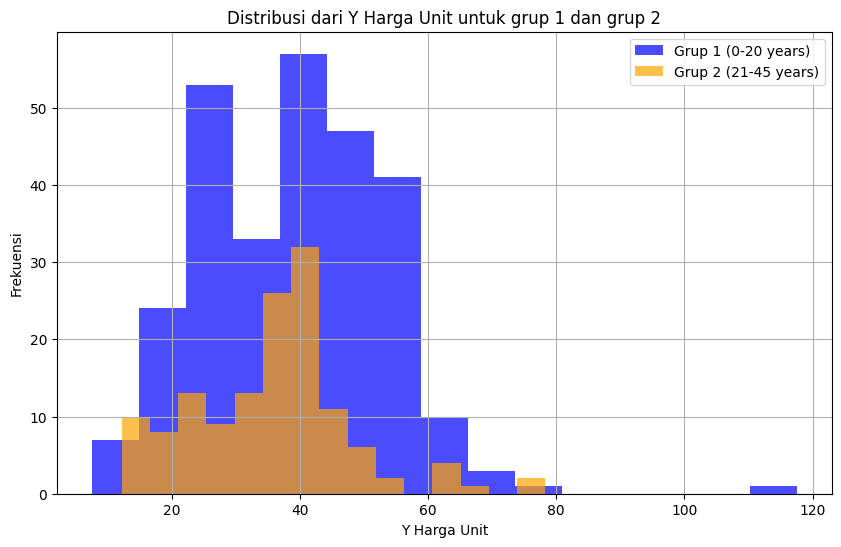

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_1['Y Harga Unit'], bins=15, alpha=0.7, label='Grup 1 (0-20 years)', color='blue')
plt.hist(df_2['Y Harga Unit'], bins=15, alpha=0.7, label='Grup 2 (21-45 years)', color='orange')
plt.xlabel('Y Harga Unit')
plt.ylabel('Frekuensi')
plt.title('Distribusi dari Y Harga Unit untuk grup 1 dan grup 2')
plt.legend()
plt.grid(True)
plt.show()

Grup 1 memiliki distribusi yang lebih lebar dengan frekuensi yang lebih tinggi dibandingkan Grup 2.

Sebagian besar data dari Grup 2 berada di dalam rentang distribusi Grup 1, tetapi dengan frekuensi lebih kecil.

# Visualisasi Boxplot untuk Grup 1 dan Grup 2

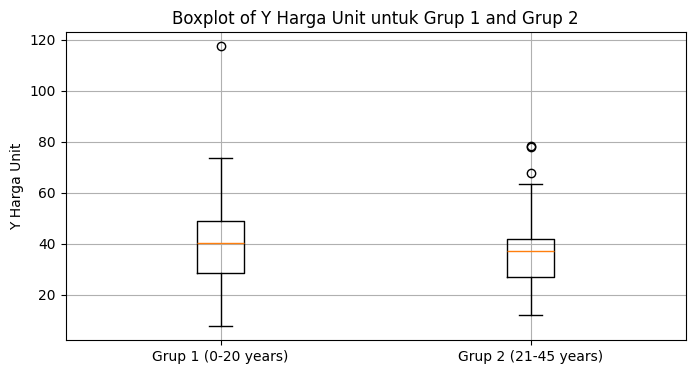

In [ ]:
plt.figure(figsize=(8, 4))
plt.boxplot([df_1['Y Harga Unit'], df_2['Y Harga Unit']], labels=['Grup 1 (0-20 years)', 'Grup 2 (21-45 years)'])
plt.title('Boxplot of Y Harga Unit untuk Grup 1 and Grup 2')
plt.ylabel('Y Harga Unit')
plt.grid(True)
plt.show()

Visualisasi boxplot menunjukkan bahwa Grup 1 memiliki distribusi harga yang lebih luas dan beberapa outlier dibandingkan Grup 2

# Korelasi

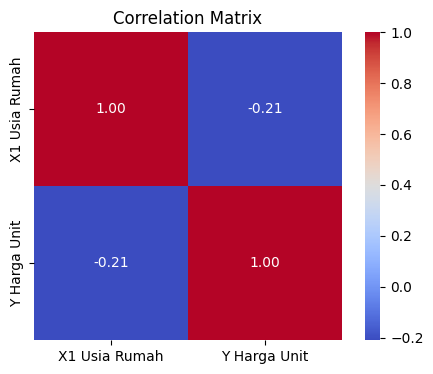

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi
correlation = df[['X1 Usia Rumah', 'Y Harga Unit']].corr()

# Plot heatmap untuk matriks korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


Korelasi -0.21 (lemah negatif) antara X1 Usia Rumah dan Y harga unit menunjukkan bahwa semakin tua usia rumah maka harganya cenderung semakin menurun.